# Project:Wrangling and Analyze Data

## Data Gathering

In [1]:
#Importing the necessary Libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
from timeit import default_timer as timer
import matplotlib.pyplot as plt

In [2]:
#Load the twitter archive dataset into a DataFrame
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Download the Image Predictions file
url = ('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

response = requests.get(url)
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [4]:
#importing the image predictions into a DataFrame
df_image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
#Query the Twitter API for each tweet in the Twitter archive and save JSON in a text file
#First we define our access keys into different variable names
#Note that the keys would be hidden to comply with Twitter's API terms

consumer_key = "HIDDEN"
consumer_secret = "HIDDEN"
access_token = "HIDDEN"
access_secret = "HIDDEN"

In [6]:
#Getting Twitter authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
#Create the API
api = tweepy.API(auth, wait_on_rate_limit = True)

In [7]:
"""#Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

#Then save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    #This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)"""

'#Query Twitter\'s API for JSON data for each tweet ID in the Twitter archive\ncount = 0\nfails_dict = {}\nstart = timer()\n\n#Then save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'tweet_json.txt\', \'w\') as outfile:\n    #This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n    for tweet_id in tweet_ids:\n        count += 1\n        print(str(count) + ": " + str(tweet_id))\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode=\'extended\')\n            print("Success")\n            json.dump(tweet._json, outfile)\n            outfile.write(\'\n\')\n        except tweepy.errors.TweepyException as e:\n            print("Fail")\n            fails_dict[tweet_id] = e\n            pass\nend = timer()\nprint(end - start)\nprint(fails_dict)'

In [8]:
#Create an empty list to store the tweets
tweet_list = []

#Then open the tweet_json.txt file
with open('tweet_json.txt', 'r') as file:
    #Iterate over each line in the file
    for line in file:
        #load the JSON data of the tweet
        tweet_data = json.loads(line)
        #Append the tweet data to the tweet list
        tweet_list.append(tweet_data)
        
#Create a DataFrame from the tweet list and specify the columns you find interesting for analysis
twitter_json = pd.DataFrame(tweet_list, columns = ['id', 'retweet_count', 'favorite_count'])

In [9]:
#Rename the ID column to tweet_id
twitter_json = twitter_json.rename(columns = {'id': 'tweet_id'})
twitter_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6872,32865
1,892177421306343426,5174,28393
2,891815181378084864,3416,21337
3,891689557279858688,7079,35818
4,891327558926688256,7587,34263
...,...,...,...
2320,666049248165822465,35,85
2321,666044226329800704,113,243
2322,666033412701032449,35,98
2323,666029285002620928,39,111


In [10]:
#Save the dataframe to a CSV file to be used Later
twitter_json.to_csv('twitter_json.csv', index=False)

## Assessing Data

###### Visually assessing the datasets

In [11]:
#Visually assessing the twitter archive dataset
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [12]:
#Visually assessing the image prediction dataset
df_image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [13]:
#Visually assessing the dataset gotten through the Twitter API
twitter_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6872,32865
1,892177421306343426,5174,28393
2,891815181378084864,3416,21337
3,891689557279858688,7079,35818
4,891327558926688256,7587,34263
...,...,...,...
2320,666049248165822465,35,85
2321,666044226329800704,113,243
2322,666033412701032449,35,98
2323,666029285002620928,39,111


###### Programmatic assessment of the datasets

In [14]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
df_twitter_archive.shape

(2356, 17)

In [17]:
#Looking for duplicated values
df_twitter_archive.duplicated().sum()

0

In [18]:
#Checking for the number of times a specific numerator was used
df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [19]:
#Checking the tweet details that has 0 rating
df_twitter_archive[df_twitter_archive.rating_numerator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [20]:
#Checking for the number of times a denominator other than 10 was used
df_twitter_archive[df_twitter_archive.rating_denominator != 10].count()[0]

23

In [21]:
#Checking for the different denominators that were used
df_twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [22]:
#Checking the denominator that is equal to 0
df_twitter_archive[df_twitter_archive.rating_denominator == 0].tweet_id

313    835246439529840640
Name: tweet_id, dtype: int64

In [23]:
#Checking for the source of tweets
df_twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [24]:
df_twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [25]:
# Check for missing values in the 'name' column
missing_names = df_twitter_archive[df_twitter_archive['name'].isnull()]
print(f"The number of dogs with missing names is {missing_names.shape[0]}")

The number of dogs with missing names is 0


In [26]:
# Check for invalid names in the 'name' column
invalid_names = df_twitter_archive[df_twitter_archive['name'].isin(['a', 'an'])]
print(f"The number of invalid names is {invalid_names.shape[0]}")

The number of invalid names is 62


In [27]:
#Checking the number of tweets that have 'a' as the name of the dog
df_twitter_archive[df_twitter_archive.name=='a'].count().tweet_id

55

In [28]:
#Checking the number of tweets where the dog has 'an' as the name
df_twitter_archive[df_twitter_archive.name=='an'].count().tweet_id

7

In [29]:
#Finding the rows in the dataset with non-null values in the retweeted_status_id column.
df_twitter_archive[df_twitter_archive['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [30]:
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [31]:
df_image_prediction.duplicated().sum()

0

In [32]:
df_image_prediction.shape

(2075, 12)

In [33]:
df_image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [34]:
#Checking to see how many rows that were incorrectly predicted in the p1_dog column
df_image_prediction[df_image_prediction['p1_dog'] ==False].count().tweet_id

543

In [35]:
#Checking to see how many rows that were incorrectly predicted in the p2_dog column
df_image_prediction[df_image_prediction['p2_dog'] ==False].count().tweet_id

522

In [36]:
#Checking to see how many rows that were incorrectly predicted in the p3_dog column
df_image_prediction[df_image_prediction['p3_dog'] ==False].count().tweet_id

576

In [37]:
#Find row where all the predictions were False
df_image_prediction[(df_image_prediction['p1_dog'] == False) & (df_image_prediction['p2_dog'] == False) & 
                    (df_image_prediction['p3_dog'] == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [38]:
twitter_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2325 non-null   int64
 1   retweet_count   2325 non-null   int64
 2   favorite_count  2325 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [39]:
twitter_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6872,32865
1,892177421306343426,5174,28393
2,891815181378084864,3416,21337
3,891689557279858688,7079,35818
4,891327558926688256,7587,34263


In [40]:
twitter_json.shape

(2325, 3)

### Quality

`df_twitter_archive` **_table_**
- `timestamp` and `retweeted_status_timestamp` columns are not in datetime format
- In the `name` column, some dogs are named 'a' or 'an'
- In `rating_denominator` some values in the column are not equal to 10
- the `tweet_id` has the wrong datatype
- `source` column has some unnecessary HTML tag, we only want where the tweet was tweeted from
- The dataset contains a large number of retweeted tweets that are not relevant to the analysis and need to be removed.
- The dataset contains reply columns that are not needed for the analysis and need to be removed.
- `tweet_id` 835246439529840640 has a denominator that is equal to 0


`df_image_prediction` **_table_**
- In the image prediction dataset, some predictions were wrong as they mislabelled the dogs

### Tidiness
- The columns `doggo`, `floffer`, `pupper` and `puppo` define the various dog stages which should be placed in a column
- The three datasets should form one observational table

## Cleaning Data

In [41]:
#First We create copies of the datasets
twitter_archive_clean = df_twitter_archive.copy()
image_prediction_clean = df_image_prediction.copy()
twitter_json_clean = twitter_json.copy()

In [42]:
#From the assessment done, there are no completeness issues in the dataset

### Issue #1: timestamp and retweeted_status_timestamp columns are not in datetime format

#### Define
Change the datetime format for the `timestamp` and `retweeted_status_timestamp` columns

#### Code

In [43]:
# Convert the timestamp column to datetime format
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'], format='%Y-%m-%d %H:%M:%S')

# Convert the retweeted_status_timestamp column to datetime format
twitter_archive_clean['retweeted_status_timestamp'] = pd.to_datetime(twitter_archive_clean['retweeted_status_timestamp'], format='%Y-%m-%d %H:%M:%S')

#### Test

In [44]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #2: in the name column, some dogs are named 'a' or 'an'

#### Define
Replace the invalid dog names 'a' and 'an' with None in the `name` column..

#### Code

In [45]:
# Replace invalid names with NaN
twitter_archive_clean['name'].replace(['a', 'an'], 'None', inplace=True)

#### Test

In [46]:
# Check for invalid names in the 'name' column after replacing them with None
invalid_names = twitter_archive_clean[twitter_archive_clean['name'].isin(['a', 'an'])]
print(f"The number of invalid names is {invalid_names.shape[0]}")

The number of invalid names is 0


### Issue #3: In rating_denominator some values in the column are not equal to 10

#### Define
Identify the rows in the dataset where the `rating_denominator` is not equal to 10 and remove those rows from the dataset

#### Code

In [47]:
# Find the list of rating_denominator not equal to 10
rating_denominator_not_10 = twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10]

# Drop the rows with rating_denominator not equal to 10
twitter_archive_clean.drop(rating_denominator_not_10.index, inplace=True)

#### Test

In [48]:
# Check that there are no rows with rating_denominator not equal to 10
assert (twitter_archive_clean['rating_denominator'] == 10).all()

In [49]:
twitter_archive_clean[twitter_archive_clean['rating_denominator'] !=10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #4: the tweet_id has the wrong datatype

#### Define 
Convert the datatype of the `tweet_id` columns in all datasets from the int to str using astype function

#### Code

In [50]:
# Convert the datatype of the 'tweet_id' column to int
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
image_prediction_clean['tweet_id'] = image_prediction_clean['tweet_id'].astype(str)
twitter_json_clean['tweet_id'] = twitter_json_clean['tweet_id'].astype(str)

#### Test

In [51]:
# Verify that the datatype of the 'tweet_id' column is string
assert twitter_archive_clean['tweet_id'].dtype == 'object'
assert image_prediction_clean['tweet_id'].dtype == 'object'
assert twitter_json_clean['tweet_id'].dtype == 'object'

In [52]:
type('tweet_id')

str

### Issue #5: source column has some unnecessary HTML tag, we only want where the tweet was tweeted from

#### Define
Remove the unnecessary HTML tags from the `source` column and keep only the text that indicates where the tweet was tweeted from using regular expressions

#### Code

In [53]:
# Use regular expressions to remove HTML tags from the 'source' column
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace(r'<[^<]+?>', '', regex=True)

#### Test

In [54]:
# Verify that the 'source' column does not contain any HTML tags
not any(twitter_archive_clean['source'].str.contains('<'))

True

In [55]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone     2198
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Issue #6: The dataset contains a large number of retweeted tweets that are not relevant to the analysis and need to be removed.

#### Define
- Identify the rows in the dataset with non-null values in the `retweeted_status_id` column.
- Remove those rows and the retweet columns from the dataset as they are not relevant to the analysis.

#### Code

In [56]:
# Find the index of retweets
retweeted_index = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].notnull()].index

# Remove the retweets rows
twitter_archive_clean.drop(retweeted_index, inplace=True)

# Remove the 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' columns
twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [57]:
# Verify that the retweet columns are no longer in the dataset
all(col not in twitter_archive_clean.columns for col in ['retweeted_status_id', 'retweeted_status_user_id',
                                             'retweeted_status_timestamp'])

True

In [58]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #7: The dataset contains reply columns that are not needed for the analysis and need to be removed.

#### Define
- Identify the rows in the dataset with non-null values in the `in_reply_to_status_id` column.
- Remove those rows and the reply columns from the dataset as they are not relevant to the analysis.

#### Code

In [59]:
# Find the index of replies
reply_index = twitter_archive_clean[twitter_archive_clean['in_reply_to_status_id'].notnull()].index

# Remove the reply rows
twitter_archive_clean.drop(reply_index, inplace=True)

# Remove the 'in_reply_to_status_id', 'in_reply_to_user_id' columns
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

#### Test

In [60]:
# Verify that the reply columns are no longer in the dataset
all(col not in twitter_archive_clean.columns for col in ['in_reply_to_status_id', 'in_reply_to_user_id'])

True

In [61]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue #8: tweet_id 835246439529840640 has a denominator that is equal to 0

#### Define
- Identify the tweet with the `tweet_id` 835246439529840640 in the dataset and remove the row containing this tweet from the dataset as it has an invalid denominator value of 0.

#### Code

In [62]:
# Find the tweet with tweet_id 835246439529840640
invalid_tweet = twitter_archive_clean[twitter_archive_clean['tweet_id'] == '835246439529840640']

# Remove the row containing this tweet
twitter_archive_clean.drop(invalid_tweet.index, inplace=True)

#### Test

In [63]:
# Verify that the tweet with tweet_id 835246439529840640 is no longer in the dataset
twitter_archive_clean['tweet_id'].isin(['835246439529840640']).any()

False

### Issue #9: In the image prediction dataset, some predictions were wrong as they mislabelled the dogs

#### Define
- Identify the predictions that were mislabelled by checking the `p1_dog`, `p2_dog`, and `p3_dog` columns for False values.
- Remove those rows from the dataset using the .drop() method.

#### Code

In [64]:
# Find the rows with False values in the 'p1_dog', 'p2_dog', and 'p3_dog' columns
mislabelled_rows = image_prediction_clean[(image_prediction_clean['p1_dog'] == False) & 
                                          (image_prediction_clean['p2_dog'] == False) & 
                                          (image_prediction_clean['p3_dog'] == False)]

# Drop the rows with 'False' values in the 'p1_dog', 'p2_dog', and 'p3_dog' columns
image_prediction_clean.drop(mislabelled_rows.index, inplace=True)

#### Test

In [65]:
# Verify that the dataset does not contain any rows with 'False' values in the 'p1_dog', 'p2_dog', and 'p3_dog' columns
image_prediction_clean[(image_prediction_clean['p1_dog'] == False) & 
                       (image_prediction_clean['p2_dog'] == False) & 
                       (image_prediction_clean['p3_dog'] == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #10: The columns doggo, floffer, pupper and puppo define the various dog stages which should be placed in a column

#### Define
Reshape the dataframe by putting the various dog stages (doggo, floofer, pupper, puppo) into a single column and converting the `doggo`, `floofer`, `pupper`, and `puppo` columns into rows

#### Code

In [66]:
# Create a new column 'dog_stage' in the dataframe and fill it as None
twitter_archive_clean['dog_stage'] = 'None'

# Use the '.loc' method to fill the 'dog_stage' column based on the values in the 'doggo', 'floofer', 'pupper', and 'puppo' columns
twitter_archive_clean.loc[twitter_archive_clean['doggo'] == 'doggo', 'dog_stage'] = 'doggo'
twitter_archive_clean.loc[twitter_archive_clean['floofer'] == 'floofer', 'dog_stage'] = 'floofer'
twitter_archive_clean.loc[twitter_archive_clean['pupper'] == 'pupper', 'dog_stage'] = 'pupper'
twitter_archive_clean.loc[twitter_archive_clean['puppo'] == 'puppo', 'dog_stage'] = 'puppo'

# Drop the 'doggo', 'floofer', 'pupper', and 'puppo' columns from the dataframe using the '.drop()' method
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [67]:
# Verify that the new 'dog_stage' column contains the correct values using the '.value_counts()' method
dog_stage_counts = twitter_archive_clean['dog_stage'].value_counts()
print(dog_stage_counts)

None       1744
pupper      230
doggo        72
puppo        24
floofer      10
Name: dog_stage, dtype: int64


In [68]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2080 non-null   object             
 1   timestamp           2080 non-null   datetime64[ns, UTC]
 2   source              2080 non-null   object             
 3   text                2080 non-null   object             
 4   expanded_urls       2077 non-null   object             
 5   rating_numerator    2080 non-null   int64              
 6   rating_denominator  2080 non-null   int64              
 7   name                2080 non-null   object             
 8   dog_stage           2080 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 162.5+ KB


In [69]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2080 non-null   object             
 1   timestamp           2080 non-null   datetime64[ns, UTC]
 2   source              2080 non-null   object             
 3   text                2080 non-null   object             
 4   expanded_urls       2077 non-null   object             
 5   rating_numerator    2080 non-null   int64              
 6   rating_denominator  2080 non-null   int64              
 7   name                2080 non-null   object             
 8   dog_stage           2080 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 162.5+ KB


### Issue #11: The three datasets should form one observational table

##### Define
- Combine the three tables using the 'merge' function 

#### Code

In [70]:
# Join the twitter_archive and image_predictions on 'tweet_id' column
df_merged = pd.merge(twitter_archive_clean, image_prediction_clean, on='tweet_id', how='left')

# Join the resulting dataset from step 1 with twitter_json on 'tweet_id' column
clean_twitter = pd.merge(df_merged, twitter_json_clean, on='tweet_id',how='left')

#### Test

In [71]:
clean_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2079
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2080 non-null   object             
 1   timestamp           2080 non-null   datetime64[ns, UTC]
 2   source              2080 non-null   object             
 3   text                2080 non-null   object             
 4   expanded_urls       2077 non-null   object             
 5   rating_numerator    2080 non-null   int64              
 6   rating_denominator  2080 non-null   int64              
 7   name                2080 non-null   object             
 8   dog_stage           2080 non-null   object             
 9   jpg_url             1650 non-null   object             
 10  img_num             1650 non-null   float64            
 11  p1                  1650 non-null   object             
 12  p1_conf             1650 non-null 

## Storing the Data

In [72]:
clean_twitter.to_csv('twitter_archive_master.csv', sep=',', index=False)

In [73]:
df = pd.read_csv('twitter_archive_master.csv', sep = ',')

In [74]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6872.0,32865.0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5174.0,28393.0
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3416.0,21337.0
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7079.0,35818.0
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7587.0,34263.0


## Visualization

In [75]:
dog_stages_dist = clean_twitter[clean_twitter['dog_stage'] != 'None']['dog_stage'].value_counts()
dog_stages_dist

pupper     230
doggo       72
puppo       24
floofer     10
Name: dog_stage, dtype: int64

Text(0.5, 1.0, 'Distribution of Dog Stages')

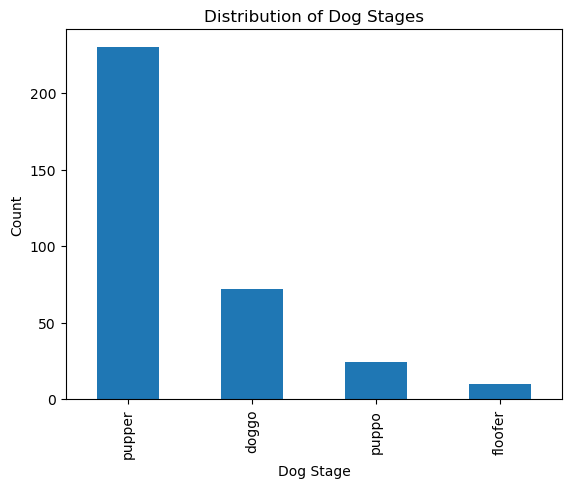

In [76]:
# Distribution of dog stages excluding 'None' values
dog_stages_dist.plot(kind='bar')
plt.xlabel('Dog Stage')
plt.ylabel('Count')
plt.title('Distribution of Dog Stages')

Text(0.5, 1.0, 'Comparison of Different Dog Breeds')

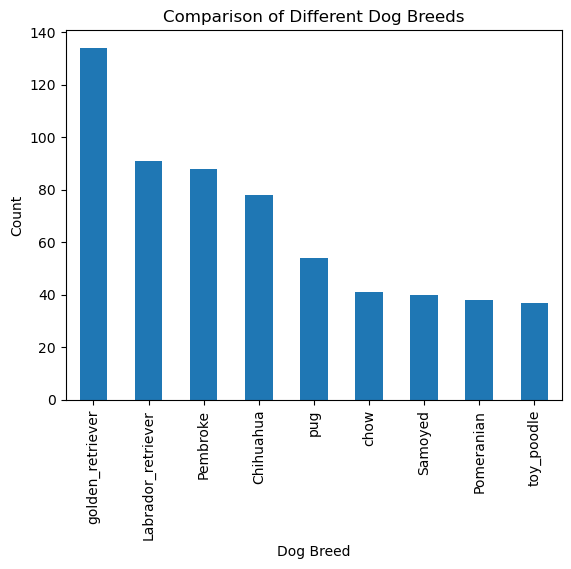

In [77]:
#Comparison of different dog breeds for first predictions by the number of rows they have
dog_breeds = clean_twitter.groupby('p1').filter(lambda x: len(x) >= 30)
dog_breeds = dog_breeds['p1'].value_counts()
dog_breeds.plot(kind='bar')
plt.xlabel('Dog Breed')
plt.ylabel('Count')
plt.title('Comparison of Different Dog Breeds')

Text(0.5, 1.0, 'Comparison of Different Dog Breeds')

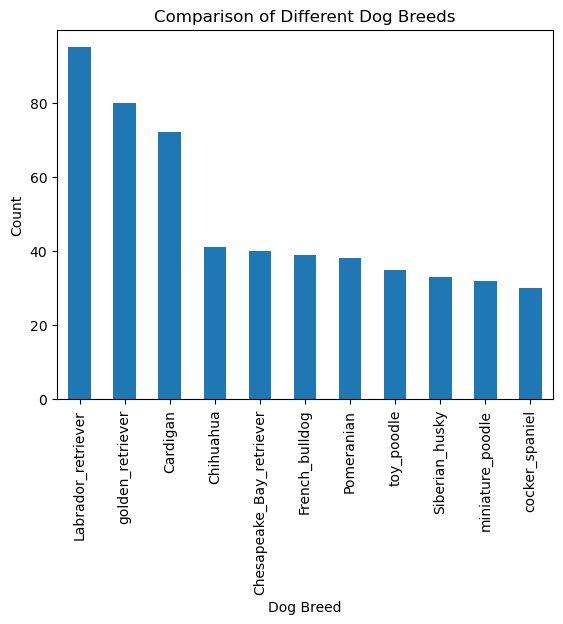

In [78]:
#Comparison of different dog breeds for second predictions by the number of rows they have
dog_breeds = clean_twitter.groupby('p2').filter(lambda x: len(x) >= 30)
dog_breeds = dog_breeds['p2'].value_counts()
dog_breeds.plot(kind='bar')
plt.xlabel('Dog Breed')
plt.ylabel('Count')
plt.title('Comparison of Different Dog Breeds')

Text(0.5, 1.0, 'Comparison of Different Dog Breeds')

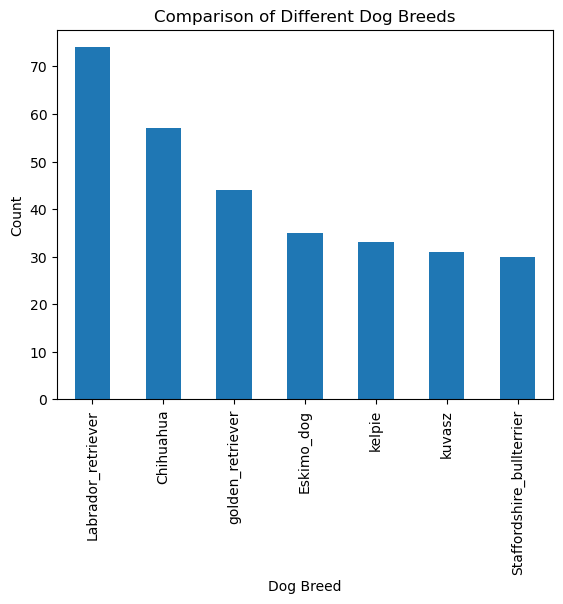

In [79]:
#Comparison of different dog breeds for third predictions by the number of rows they have
dog_breeds = clean_twitter.groupby('p3').filter(lambda x: len(x) >= 30)
dog_breeds = dog_breeds['p3'].value_counts()
dog_breeds.plot(kind='bar')
plt.xlabel('Dog Breed')
plt.ylabel('Count')
plt.title('Comparison of Different Dog Breeds')

Text(0.5, 1.0, 'Proportion of Different Dog Stages')

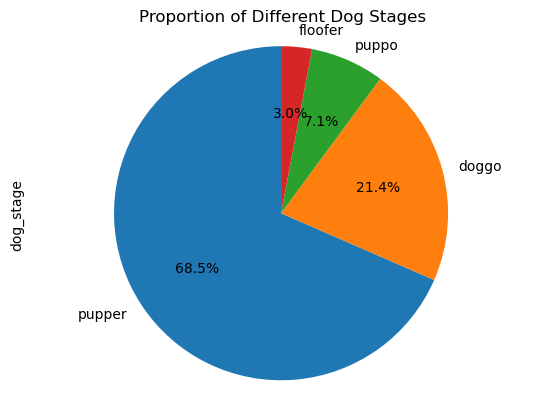

In [80]:
#Proportion of different dog stages
dog_stages_prop = clean_twitter[clean_twitter['dog_stage'] != 'None']['dog_stage'].value_counts()
dog_stages_prop.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proportion of Different Dog Stages')

In [81]:
# Count the number of occurrences of each source
source_counts = clean_twitter['source'].value_counts()
source_counts

Twitter for iPhone     1947
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

Text(0.5, 1.0, 'Distribution of tweet sources')

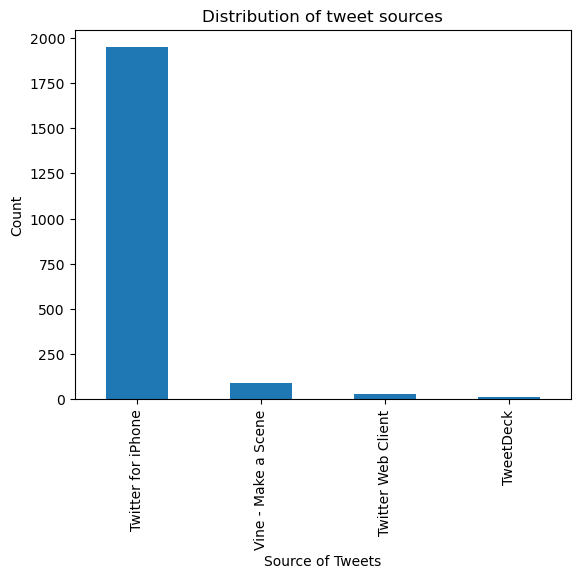

In [82]:
source_counts.plot(kind='bar')
plt.xlabel('Source of Tweets')
plt.ylabel('Count')
plt.title('Distribution of tweet sources')

In [83]:
#Count the number of occurences of each dog name
dog_name_count = clean_twitter[clean_twitter['name']!='None'].groupby('name').size().sort_values(ascending=False)
dog_name_count.head()

name
Charlie    11
Lucy       11
Cooper     10
Oliver     10
Tucker      9
dtype: int64

Text(0.5, 1.0, 'Distribution of dog names')

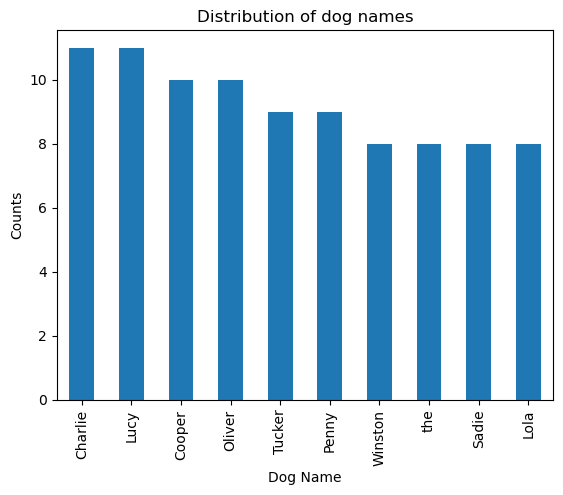

In [84]:
dog_name_count.head(10).plot(kind='bar')
plt.xlabel('Dog Name')
plt.ylabel('Counts')
plt.title('Distribution of dog names')

## Insights
1. The most popular dog stages are 'pupper' and 'doggo', with 'pupper' being more common.
2. The most common dog breeds are the Golden Retriever and Labrador Retriever.
3. The most common source for tweets is Twitter for iPhone.
4. The most popular dog names are Charlie, Lucy, and Cooper.